# Détection de la position d'un usager

In [1]:
from src.plot import openImage
import matplotlib.pyplot as plt

In [2]:
ECHELLE = 100
image_batiment = openImage("./images/batiment.png")

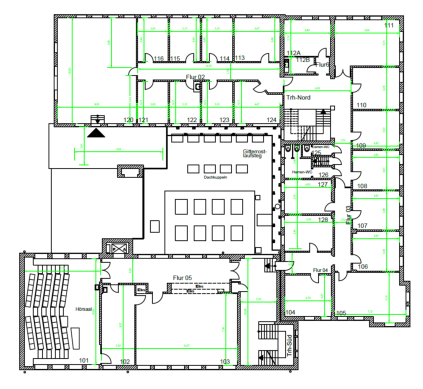

In [3]:
plt.imshow(image_batiment)
plt.axis('off')
plt.show()

## Avec les positions des points d'accès

### Visualisation des fichiers utilisés

`Fichier contenant les positions des points d'accès ainsi que les forces de leurs signaux reçus par l'usager`

* X : position en (x) du point d'accès 
* Y : position en (y) du point d'accès 

In [4]:
import pandas as pd
df = pd.read_csv("./datas/with_acces/BSSID.csv", sep=";")
df

,SSID,BSSID,Signal(%),X,Y
0,eduroam,f4:ea:b5:b0:d4:25,90,3.04,6.37
1,eduroam,f4:ea:b5:dc:15:25,65,4.27,6.43
2,eduroam,f4:ea:b5:dc:6d:96,100,5.65,6.50
3,eduroam,f4:ea:b5:dc:15:25,85,5.77,8.03
4,THGA,f4:ea:b5:dc:2f:15,70,7.38,2.16


### Calcul de la position de l'usager

`Calcul de la position de l'usager depuis le fichier`

* Chargement du fichier des positions de points d'accès
* Calcul de la position proprement dite

In [5]:
from src.detect_user import detect_with_acces
from src.load import load_acces_points_2d

In [6]:
A, W = load_acces_points_2d("./datas/with_acces/BSSID.csv")
M = detect_with_acces(A, W)

In [7]:
from src.plot import plot_position

[position détectée]  
 M (x : 5.500044156883335, y : 5.1567133422251095)


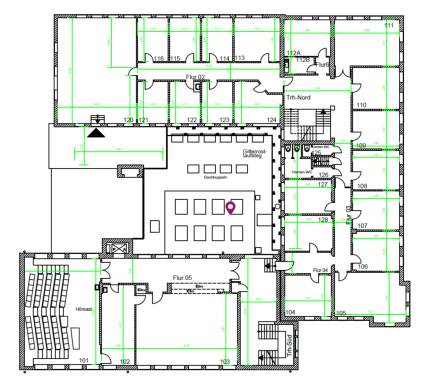

In [8]:
print("[position détectée]  ")
print(f" M (x : {M[0]}, y : {M[1]})")

image = plot_position(
    M,
    None,
    "./images/pointeur_violet.png",
    image=image_batiment,
    echelle=ECHELLE,
    showed=False
)

plt.imshow(image)
plt.axis('off')
plt.show()

## Avec l'ensemble de positions des signaux collectés en avance

### Visualisation des fichiers utilisés

`Fichier contenant les signaux reçus par l'usager`

In [9]:
import pandas as pd
df = pd.read_csv("./datas/without_acces/BSSID_user.csv", sep=";")
df

,SSID,BSSID,Signal(%)
0,eduroam,f4:ea:b5:b0:d4:25,90
1,eduroam,f4:ea:b5:dc:15:25,65
2,eduroam,f4:ea:b5:dc:6d:96,90
3,THGA,f4:ea:b5:dc:2f:15,70


`Fichier contenant les signaux collectés et les positions où ils ont été prises`

* X : position en (x) où a été collecté le signal
* Y : position en (y) où a été collecté le signal

In [10]:
df = pd.read_csv("./datas/without_acces/BSSIDs_collected.csv", sep=";")
df

,SSID,BSSID,Signal(%),X,Y
0,eduroam,f4:ea:b5:b0:d4:25,90,3.04,6.37
1,eduroam,f4:ea:b5:dc:6d:a5,15,3.04,6.37
2,eduroam,f4:ea:b5:dc:15:25,70,3.04,6.37
3,eduroam,f4:ea:b5:b0:d4:16,100,3.04,6.37
4,eduroam,f4:ea:b5:dc:15:16,80,3.04,6.37
...,...,...,...,...,...
449,DIRECT-94-HP ENVY Photo 7800,16:cb:19:29:6f:94,20,2.95,1.78
450,DIRECT-94-HP ENVY Photo 7801,16:cb:19:29:6f:94,85,2.95,1.78
451,Vodafone Homespot,a2:e7:ae:36:cf:a0,14,2.95,1.78
452,ClickShare-Labor008,f4:6a:dd:30:1e:25,65,2.95,1.78


On a `454` signaux récoltés dans le fichier csv

### Calcul de la position de l'usager par similarité de signaux

`Calcul de la position de l'usager depuis le fichier`

* Chargement du fichier des signaux de l'usager
* Chargement des signaux collectés avec les positions où ils ont été prises
* Calcul de la position proprement dite

In [11]:
from src.detect_user import detect_collected_sim
from src.load import load_collected_user, load_collected_positions_2d

In [12]:
E = load_collected_user("./datas/without_acces/BSSID_user.csv")
P, D = load_collected_positions_2d("./datas/without_acces/BSSIDs_collected.csv")
M = detect_collected_sim(E, P, D)

[Position détectée]  
 M (x : 5.010830987562494, y : 7.287393508327559)


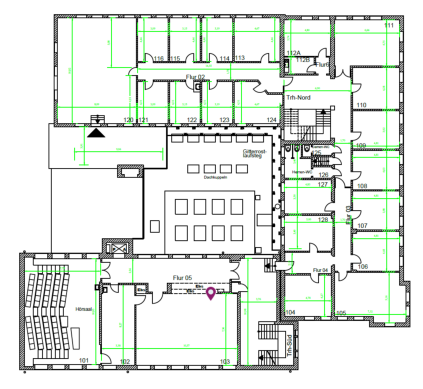

In [13]:
if M is not None:
    print("[Position détectée]  ")
    print(f" M (x : {M[0]}, y : {M[1]})")
    
    image = plot_position(
        M,
        None,
        "./images/pointeur_violet.png",
        image=image_batiment,
        echelle=ECHELLE,
        showed=False
    )
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("[Aucune position détectée]  ")

### Calcul de la position de l'usager en calculant d'abord les points d'accès

##### `Calcul des positions des points d'accès`

* Chargement et segmentation des signaux collectés par points d'accès
* Calcul les positions des points d'accès

In [14]:
from src.load import load_to_compute_acces_points_2d
from src.detect_access_points import detect_collected_access
from src.save import save_acces_points_2d

In [15]:
C = load_to_compute_acces_points_2d("./datas/without_acces/BSSIDs_collected.csv")

In [16]:
access_points = detect_collected_access(C)

In [17]:
pacs = save_acces_points_2d(access_points, "./datas/without_acces/access_points_compute.csv")
pacs

,BSSID,X,Y
0,16:cb:19:29:6f:94,2.743057,1.641243
1,18:58:80:17:92:fe,2.620385,1.658205
2,18:58:80:17:93:00,2.636579,1.624943
3,34:31:c4:c5:36:90,2.614000,1.676292
4,a2:e7:ae:36:cf:a0,2.669693,1.568415
...,...,...,...
111,f4:ea:b5:dc:6d:94,4.937362,6.823671
112,f4:ea:b5:dc:6d:95,6.059023,6.643390
113,f4:ea:b5:dc:6d:96,6.080544,6.622807
114,f4:ea:b5:dc:6d:a4,4.697995,6.633185


In [18]:
pacs[["X", "Y"]]

,X,Y
0,2.743057,1.641243
1,2.620385,1.658205
2,2.636579,1.624943
3,2.614000,1.676292
4,2.669693,1.568415
...,...,...
111,4.937362,6.823671
112,6.059023,6.643390
113,6.080544,6.622807
114,4.697995,6.633185


##### `Calcul de la position de l'usager`

In [19]:
from src.detect_user import detect_collected_compute_access

In [20]:
M, _ = detect_collected_compute_access(E, access_points)

In [21]:
from src.plot import plot_access_user

[Position détectée]  
 M (x : 6.412645570018419, y : 5.383029865204542)


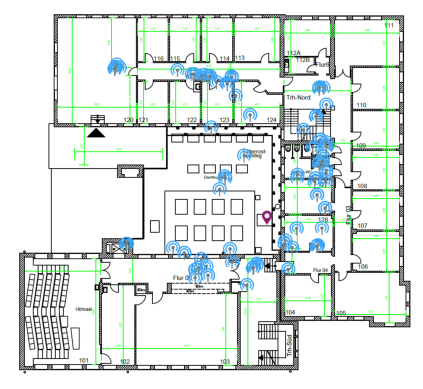

In [22]:
if M is not None:
    print("[Position détectée]  ")
    print(f" M (x : {M[0]}, y : {M[1]})")
    
    image = plot_access_user(
        access_points,
        M,
        None,
        "./images/signal.png",
        "./images/pointeur_violet.png",
        image=image_batiment,
        echelle=ECHELLE,
        showed=False
    )
    
    plt.imshow(image)
    plt.axis('off')
    plt.show()

else:
    print("[Aucune position détectée]  ")